# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



### Age of the candidates grouped by parties.

In [25]:
import pandas as pd

df = pd.read_excel("alldata.xlsx")

dff = df[df["alder"] > 0] #Exclude those without age provided
age_by_party = dff.groupby("parti")["alder"].describe()

print(age_by_party)

                                             count       mean        std  \
parti                                                                      
Alternativet                                  65.0  47.415385  13.620862   
Danmarksdemokraterne                          37.0  51.216216  10.252737   
Dansk Folkeparti                              49.0  45.530612  12.191360   
Det Konservative Folkeparti                   94.0  44.723404  11.904101   
Enhedslisten                                  71.0  42.225352  15.193229   
Frie Grønne, Danmarks Nye Venstrefløjsparti   26.0  34.807692  10.777826   
Kristendemokraterne                           41.0  50.219512  13.441563   
Liberal Alliance                              68.0  37.970588  13.736291   
Løsgænger                                      3.0  48.000000   9.165151   
Moderaterne                                   42.0  44.261905  13.778845   
Nye Borgerlige                                50.0  48.520000  12.241182   
Radikale Ven

- Count = how many.
- Mean = average.
- Std (Standard deviation) = average amount deviating from the mean.

- 25% and 75% have an age below that value.
- 50% = median.

### An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.

                     navn                                        parti  \
505          Sarah Nørris                                 Enhedslisten   
88          Søren Vanting                  Det Konservative Folkeparti   
559   Kim Andkjær Doberck                               Nye Borgerlige   
44      Mohamed Abdikarim  Frie Grønne, Danmarks Nye Venstrefløjsparti   
152            Rashid Ali  Frie Grønne, Danmarks Nye Venstrefløjsparti   
..                    ...                                          ...   
308        Morten Klessen                            Socialdemokratiet   
699           Kasper Roug                            Socialdemokratiet   
216  Lars Aslan Rasmussen                            Socialdemokratiet   
643     Søren Lund Hansen                             Dansk Folkeparti   
509     Michael Mikkelsen                         Danmarksdemokraterne   

     confidence_proportion  
505               1.000000  
88                1.000000  
559               0.8979

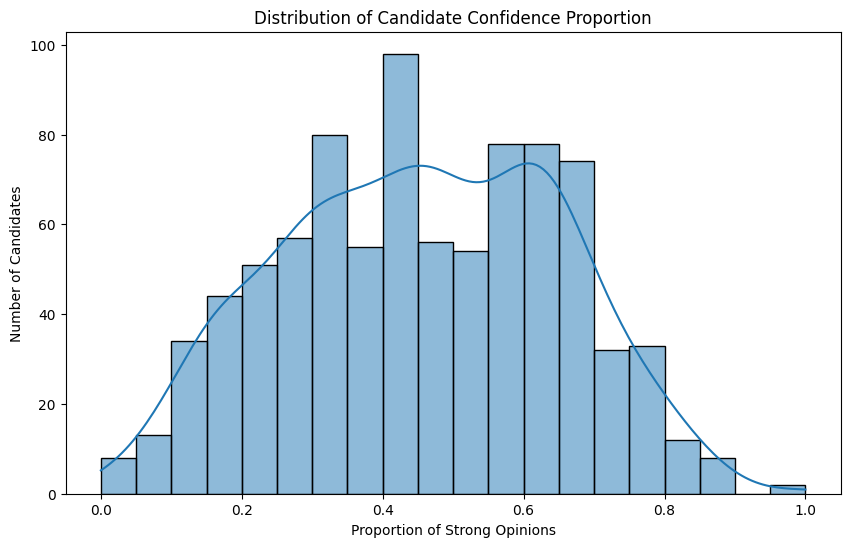

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_confidence_proportion(row):
    # Identify The amount of questions, to get the confidence proportion in later calculation.
    valid_responses = [value for value in row if isinstance(value, int) and -2 <= value <= 2]
    
    if not valid_responses:
        return 0

    # Count the "strongly agree" (2) and "strongly disagree" (-2) responses
    confident_responses = sum(1 for r in valid_responses if r == 2 or r == -2)
    
    proportion = confident_responses / len(valid_responses)
    return proportion

answer_columns = df.columns.difference(['navn', 'parti', 'alder'])

df_filtered = df[['navn', 'parti'] + list(answer_columns)]

# Apply the function to each row (candidate)
df_filtered["confidence_proportion"] = df_filtered.apply(calculate_confidence_proportion, axis=1)

df_sorted = df_filtered.sort_values(by="confidence_proportion", ascending=False)

print(df_sorted[["navn", "parti", "confidence_proportion"]])

plt.figure(figsize=(10, 6))
sns.histplot(df_sorted["confidence_proportion"], bins=20, kde=True)
plt.title("Distribution of Candidate Confidence Proportion")
plt.xlabel("Proportion of Strong Opinions")
plt.ylabel("Number of Candidates")
plt.show()

NOTE: The numberes printed is two values lower than what is showen in excel as starts at two and the dataframe starts at 0 for the first person.

### Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.

Intra-party disagreements:
parti
Løsgænger                                      1.450230
Kristendemokraterne                            1.030463
Alternativet                                   0.909648
Moderaterne                                    0.890754
Dansk Folkeparti                               0.888009
Det Konservative Folkeparti                    0.887302
Radikale Venstre                               0.857237
Venstre                                        0.834677
Socialdemokratiet                              0.825141
Liberal Alliance                               0.730710
Enhedslisten                                   0.678929
Frie Grønne, Danmarks Nye Venstrefløjsparti    0.667277
Socialistisk Folkeparti                        0.663276
Danmarksdemokraterne                           0.608890
Nye Borgerlige                                 0.561642
dtype: float64

Inter-party disagreement:
1.3905558196725925


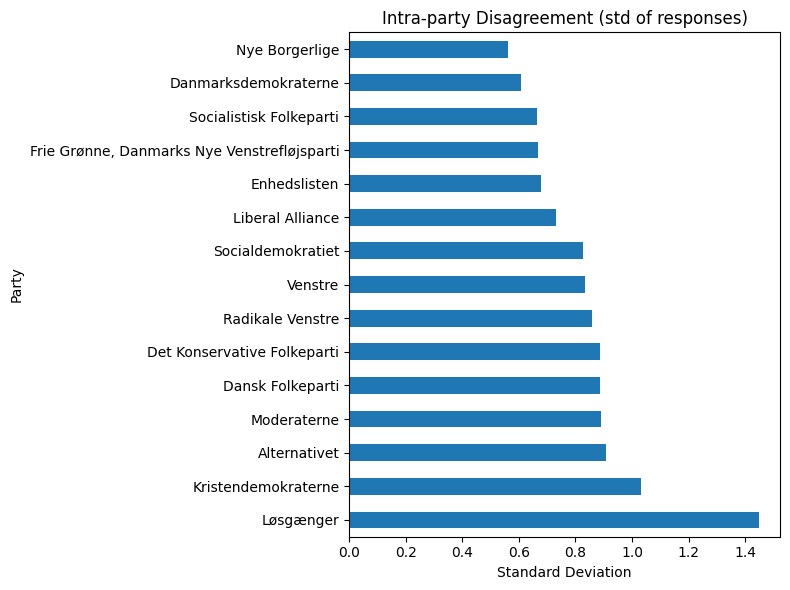

In [27]:

import matplotlib.pyplot as plt

response_columns = df.select_dtypes(include='number').columns.difference(['alder'])

def calculate_confidence(row):
    answered_questions = row.dropna()
    confident_responses = answered_questions.isin([-2, 2,-1, 1, 0]).sum()
    return confident_responses / len(answered_questions) if len(answered_questions) > 0 else 0

df["confidence_score"] = df[response_columns].apply(calculate_confidence, axis=1)

# Calculate intra-party disagreement (standard deviation of responses per party)
intra_party_disagreement = df.groupby("parti")[response_columns].std().mean(axis=1).sort_values(ascending=False)

# Calculate inter-party disagreement (standard deviation across all parties)
inter_party_disagreement = df[response_columns].std().mean()

print("Intra-party disagreements:")
print(intra_party_disagreement)
print("\nInter-party disagreement:")
print(inter_party_disagreement)


intra_party_disagreement.plot(kind='barh', figsize=(8, 6), title='Intra-party Disagreement (std of responses)')
plt.xlabel("Standard Deviation")
plt.ylabel("Party")
plt.tight_layout()
plt.show()


Calculated as the averge standard deviation (spread) of their responses across all questions. First be every single question then averge that. 

On average, each candidate's response differs from the party's mean response by about * points on the response scale.

The parties with the highest dissagrement are the "Løsgænger" which makes sense as they are independent candidates and are not bound by a shared ideoligy. Among the other estblished parties there are the "KristenDemokraterne" and "Alternativet" Which are the ones that showes the most internal dissagreement, this suggestes a broad range of the values of the candidates within.

Then we have the "Nye Borgerlige" and "Danmarksdemokraterne" at the lowest end, with the least internal dissagreement, indicating their members align closely on key issues.
The parties with the least dissagreement are also some of the newer parties. This could also makes sense as they are newer and they have yet to form a difffrences in opinion and only the ones who shares most of the values has joined the party.

**High intra-party disagreement (e.g., Kristendemokraterne, Alternativet):**

These parties might have a broader ideological spectrum internally.

Could suggest less centralized control, or room for internal diversity and debate.

Might struggle more with clear messaging to voters.

**Low intra-party disagreement (e.g., Enhedslisten, Nye Borgerlige):**

Members are more ideologically aligned.

Could reflect strong party discipline, clear shared goals, or ideological rigidity.

**Comparing with inter-party disagreement:**

If intra-party disagreement > inter-party, then some parties are less ideologically distinct from others.

If inter-party disagreement is high, parties are generally well-differentiated — which helps voters distinguish them.

### Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.


=== Model: Decision Tree ===
Accuracy: 0.8208
                                             precision    recall  f1-score   support

                               Alternativet       0.69      0.79      0.73        14
                       Danmarksdemokraterne       0.86      0.86      0.86         7
                           Dansk Folkeparti       0.75      0.90      0.82        10
                Det Konservative Folkeparti       0.93      0.65      0.76        20
                               Enhedslisten       1.00      1.00      1.00        15
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.75      0.60      0.67         5
                        Kristendemokraterne       0.57      0.50      0.53         8
                           Liberal Alliance       0.81      0.93      0.87        14
                                Moderaterne       0.80      1.00      0.89         8
                             Nye Borgerlige       0.82      0.90      0.86        10
                 

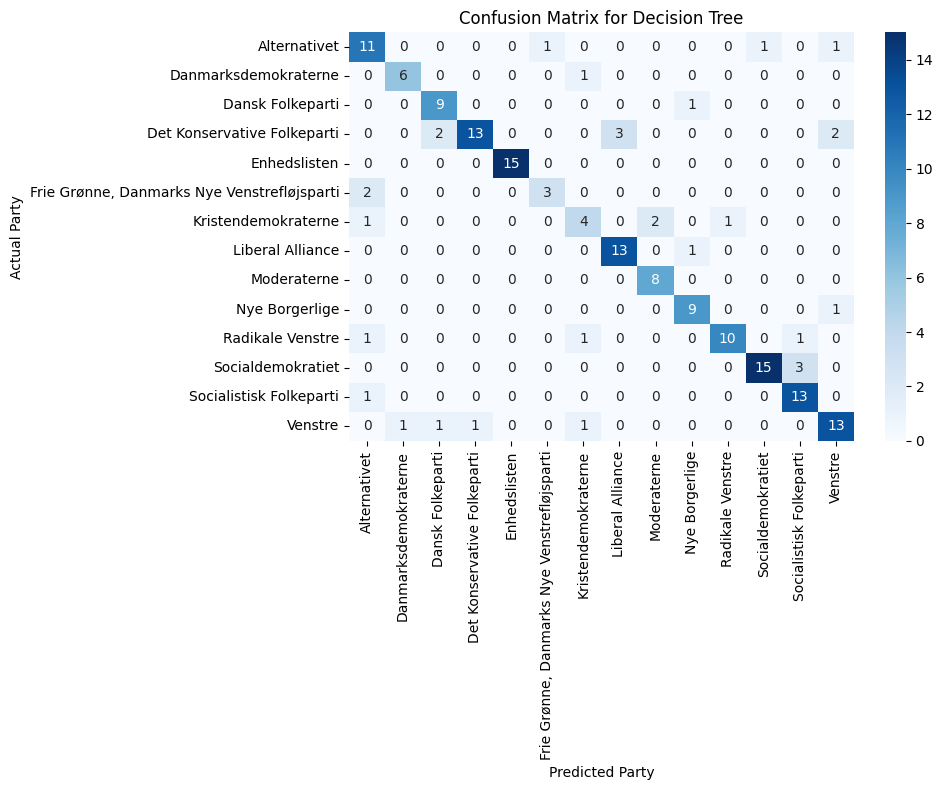


=== Model: Random Forest ===
Accuracy: 0.9422
                                             precision    recall  f1-score   support

                               Alternativet       0.88      1.00      0.93        14
                       Danmarksdemokraterne       1.00      1.00      1.00         7
                           Dansk Folkeparti       0.91      1.00      0.95        10
                Det Konservative Folkeparti       0.94      0.80      0.86        20
                               Enhedslisten       1.00      1.00      1.00        15
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.60      0.75         5
                        Kristendemokraterne       1.00      0.88      0.93         8
                           Liberal Alliance       0.82      1.00      0.90        14
                                Moderaterne       1.00      1.00      1.00         8
                             Nye Borgerlige       1.00      1.00      1.00        10
                 

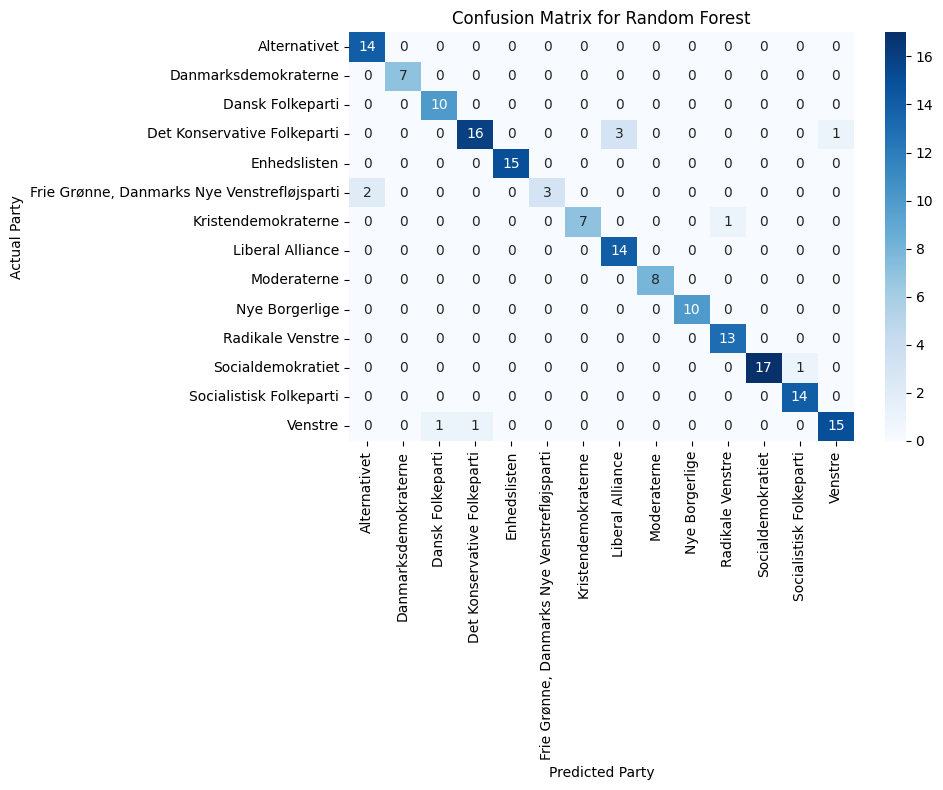


=== Model: Gradient Boosted Tree ===
Accuracy: 0.8439
                                             precision    recall  f1-score   support

                               Alternativet       0.81      0.93      0.87        14
                       Danmarksdemokraterne       0.83      0.71      0.77         7
                           Dansk Folkeparti       0.90      0.90      0.90        10
                Det Konservative Folkeparti       0.80      0.80      0.80        20
                               Enhedslisten       0.94      1.00      0.97        15
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.40      0.57         5
                        Kristendemokraterne       1.00      0.62      0.77         8
                           Liberal Alliance       0.78      1.00      0.88        14
                                Moderaterne       0.80      1.00      0.89         8
                             Nye Borgerlige       1.00      0.90      0.95        10
         

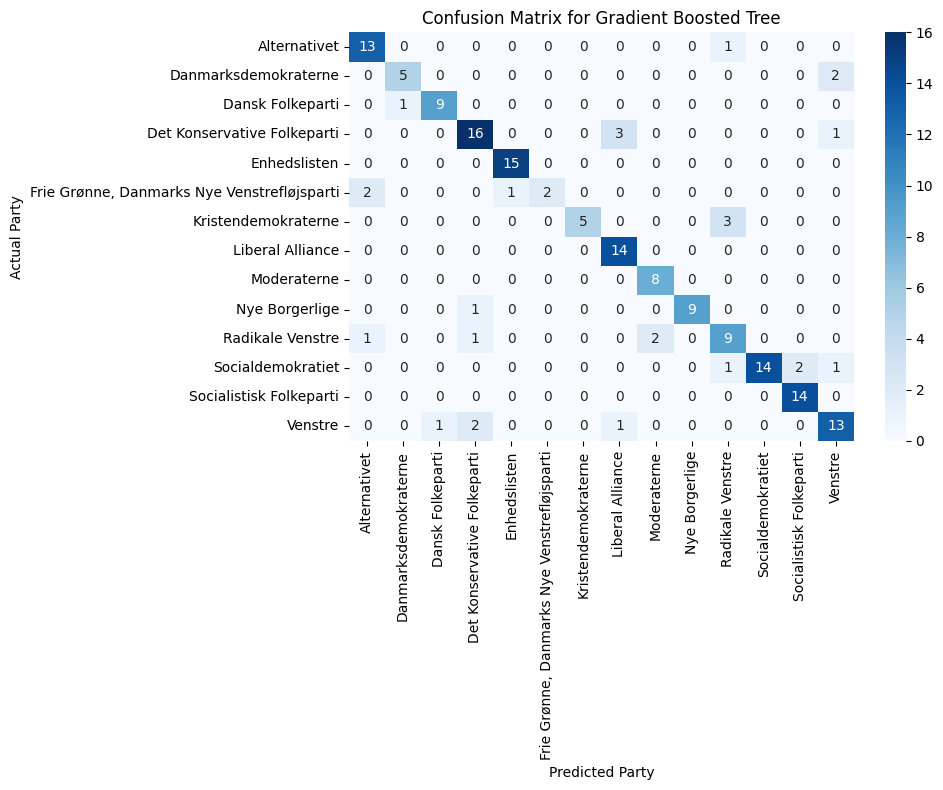


=== Model: K-Nearest Neighbors ===
Accuracy: 0.8613
                                             precision    recall  f1-score   support

                               Alternativet       0.83      0.71      0.77        14
                       Danmarksdemokraterne       1.00      0.86      0.92         7
                           Dansk Folkeparti       0.90      0.90      0.90        10
                Det Konservative Folkeparti       0.94      0.85      0.89        20
                               Enhedslisten       0.70      0.93      0.80        15
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      1.00      1.00         5
                        Kristendemokraterne       1.00      0.75      0.86         8
                           Liberal Alliance       0.82      1.00      0.90        14
                                Moderaterne       0.80      1.00      0.89         8
                             Nye Borgerlige       0.83      1.00      0.91        10
           

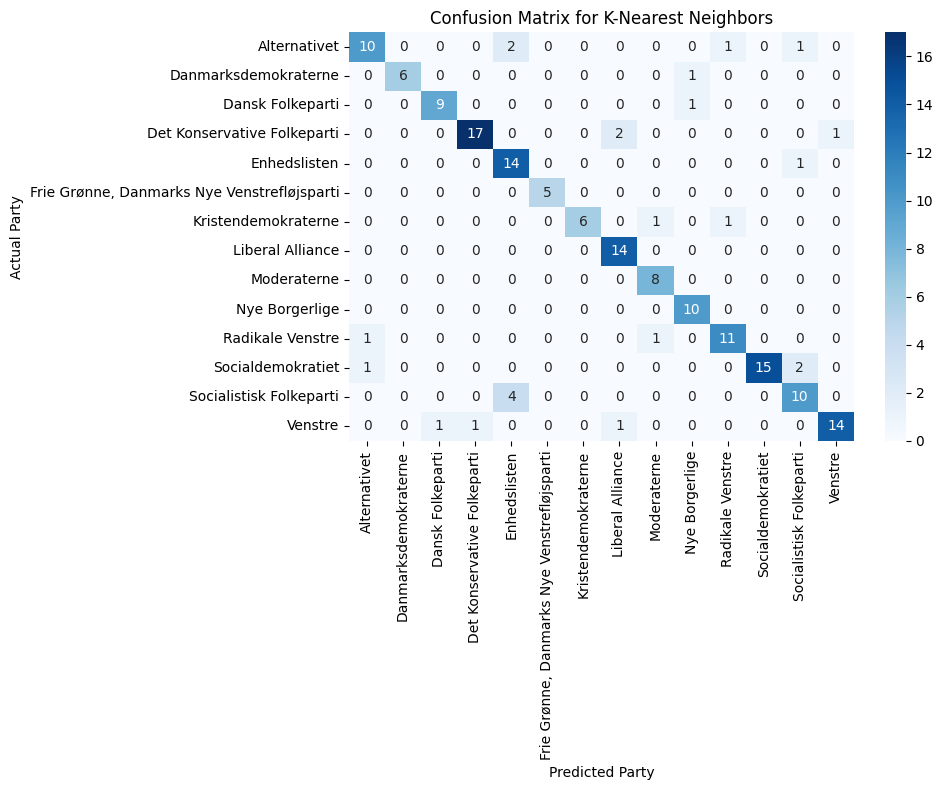


=== Model: Logistic Regression ===
Accuracy: 0.9017
                                             precision    recall  f1-score   support

                               Alternativet       0.93      0.93      0.93        14
                       Danmarksdemokraterne       0.86      0.86      0.86         7
                           Dansk Folkeparti       0.90      0.90      0.90        10
                Det Konservative Folkeparti       0.94      0.75      0.83        20
                               Enhedslisten       1.00      0.93      0.97        15
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.80      0.80      0.80         5
                        Kristendemokraterne       1.00      0.75      0.86         8
                           Liberal Alliance       0.88      1.00      0.93        14
                                Moderaterne       1.00      1.00      1.00         8
                             Nye Borgerlige       0.91      1.00      0.95        10
           

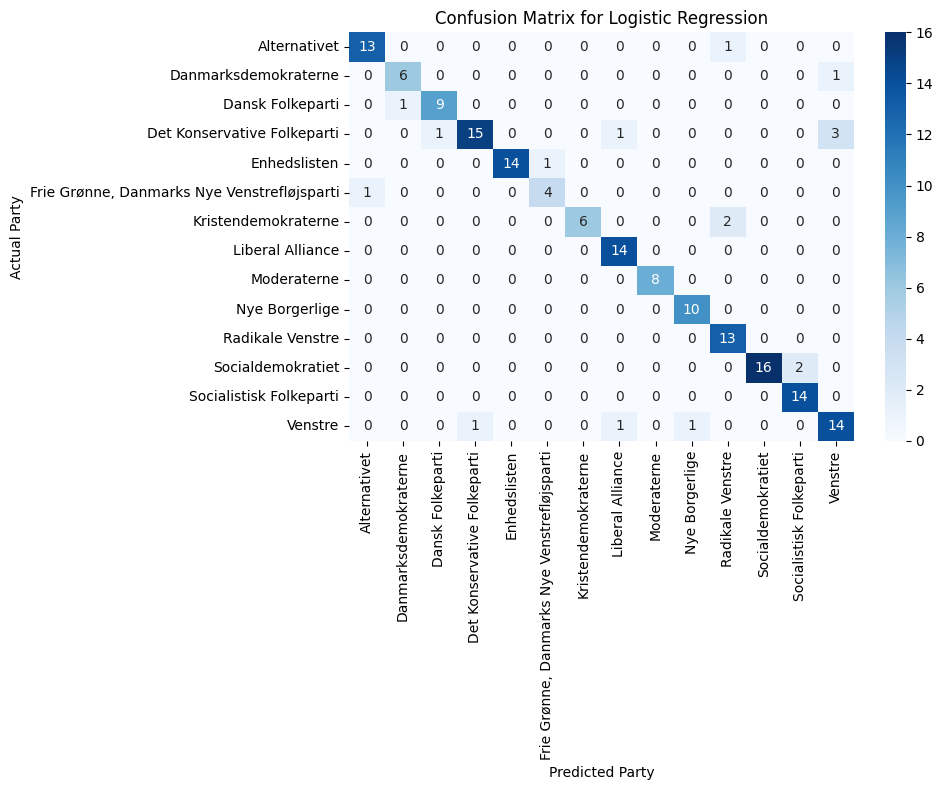


=== Model: Linear Regression ===
Mean Squared Error: 8.1549
R² Score: 0.5424
Politicians in the wrong party:
                                  Name                                Actual Party                             Predicted Party
                Frederik Bloch Münster                 Det Konservative Folkeparti                                Enhedslisten
                      Lars Goldschmidt                           Socialdemokratiet                            Radikale Venstre
                        Bo Ritterbusch                            Liberal Alliance Frie Grønne, Danmarks Nye Venstrefløjsparti
                    Charlotte Lindberg                                Enhedslisten                 Det Konservative Folkeparti
               Søren Lydeking Pedersen                         Kristendemokraterne                              Nye Borgerlige
                    Niels Martin Viuff                 Det Konservative Folkeparti Frie Grønne, Danmarks Nye Venstrefløjsparti
 

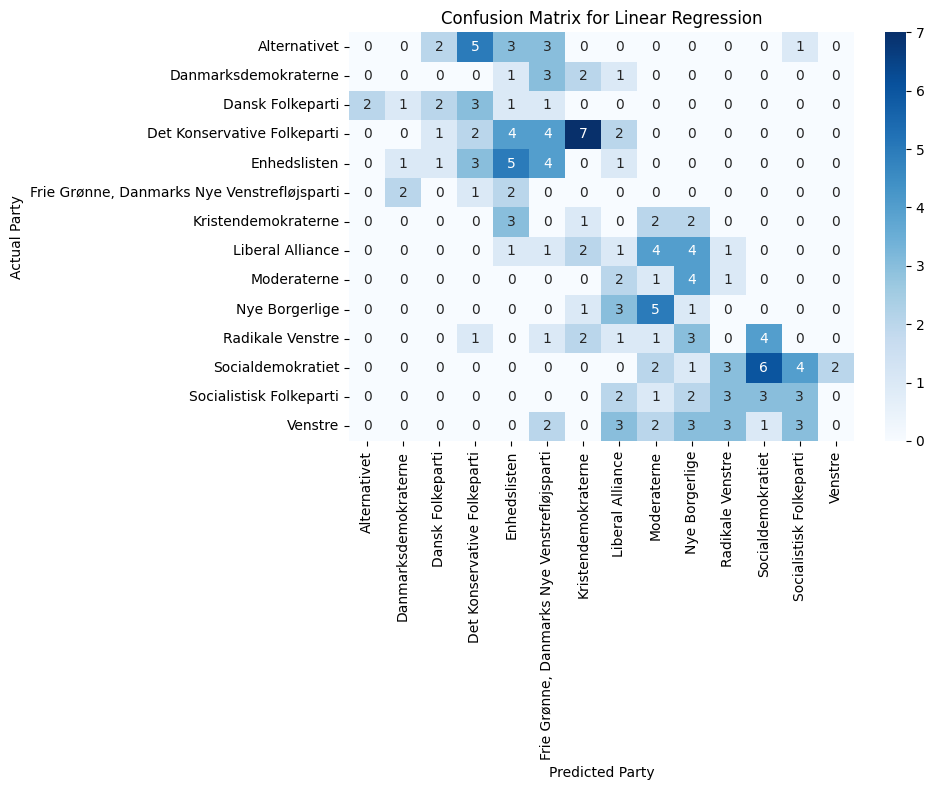

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data
df_filtered = df[df['parti'] != 'Løsgænger']
names = df_filtered['navn']

X = df_filtered.drop(columns=['parti'])
y = df_filtered['parti']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Get the names for the test set using original indices
y_test_names = names.loc[y_test.index].values

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Preprocessor: numeric imputation + one-hot encoding
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

# Fit and transform once
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Encode labels once
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

valid_labels = label_encoder.classes_

# Models dictionary
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosted Tree": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=100000),
    "Linear Regression": LinearRegression()
}

for name, model in models.items():
    print(f"\n=== Model: {name} ===")

    # Fit model
    if name == "Linear Regression":
        model.fit(X_train_preprocessed, y_train_encoded)
        y_pred = model.predict(X_test_preprocessed)

        # Convert predictions to nearest class
        y_pred_rounded = np.round(y_pred).astype(int)
        y_pred_rounded = np.clip(y_pred_rounded, 0, len(valid_labels) - 1)
        y_pred_party = valid_labels[y_pred_rounded]

        # Metrics for regression treated as classification approximation
        mse = mean_squared_error(y_test_encoded, y_pred)
        r2 = model.score(X_test_preprocessed, y_test_encoded)

        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R² Score: {r2:.4f}")
    else:
        model.fit(X_train_preprocessed, y_train_encoded)
        y_pred_encoded = model.predict(X_test_preprocessed)
        y_pred_party = label_encoder.inverse_transform(y_pred_encoded)

        acc = accuracy_score(y_test, y_pred_party)
        print(f"Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred_party))

    # Show misclassified samples
    y_test_party = label_encoder.inverse_transform(y_test_encoded)
    results = pd.DataFrame({
        'Actual Party': y_test_party,
        'Predicted Party': y_pred_party
    })

    results = pd.DataFrame({
        'Name': y_test_names,
        'Actual Party': y_test_party,
        'Predicted Party': y_pred_party
    })

    wrong_predictions = results[results['Actual Party'] != results['Predicted Party']]

    print("Politicians in the wrong party:")
    print(wrong_predictions.to_string(index=False))

    # Plot confusion matrix (skip for Linear Regression if you want)
    cm = confusion_matrix(y_test_party, y_pred_party, labels=valid_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=valid_labels, yticklabels=valid_labels)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted Party')
    plt.ylabel('Actual Party')
    plt.tight_layout()
    plt.show()


**Notes on performance**

The gradient boosted tree performed better than decision tree but noticeably worse than random forest, probably look into tuning (hyperparameters) with learning rate etc since it is senetative to that.

Mostly linearly separable in this multi-feature space — parties tend to form somewhat distinct regions separated by linear boundaries.

Clustered by party — candidates from the same party tend to group together.

With some non-linear nuances — certain candidates or party boundaries require more complex decision rules to classify correctly.

| Model                         | Accuracy      | What it implies                                                                        |
| ----------------------------- | ------------- | -------------------------------------------------------------------------------------- |
| Decision Tree (82.1%)         | Moderate      | Captures simple, hierarchical splits but limited complexity.                           |
| Random Forest (94.2%)         | High          | Many trees average out well, capturing complex interactions and noise.                 |
| Gradient Boosted Tree (84.4%) | Moderate-High | Sequentially improves on mistakes; good at subtle patterns, look into tuning hyperpara |
| K-Nearest Neighbors (86.1%)   | Moderate      | Good clustering in feature space, neighbors are similar.                               |
| Logistic Regression (90.2%)   | High          | Strong linear separability in **high-dimensional space**.                              |


**The party Løsgænger does not have enough data to be properly split into train and test**

Combine rare classes into an “Other” category
This way, "Løsgænger" joins a bigger group with more samples that can be split normally. (It is a special party so that would be had to join with a bigger group)

Remove extremely rare classes from the dataset (if allowed).

Collect more data (best but often not feasible).

Use cross-validation without stratification on rare classes — but this might not solve the issue fully.

**Support**: The number of instances the labels is in the traning data.

**Precision**: The ratio of correctly predicted positive observations to the total predicted positives.

**Recall**: The ratio of correctly predicted positive observations to all the observations in the actual class.

**F1-score**: The weighted average of Precision and Recall.

**How logisitc regression works for this multiclass**

One-vs-Rest (OvR), From sigmoid outputs of each model by splitting it up, Is it this or not for every single one. Picks the one with the highest probability

In [29]:
import pandas as pd
import numpy as np
from collections import Counter

# Models that support probability
prob_models = ["Decision Tree", "Random Forest", "Gradient Boosted Tree", "Logistic Regression", "K-Nearest Neighbors"] #Decision trees and KNN have less stable predictions (Consider excluding them)

# Dictionary to track predictions for each candidate
candidate_predictions = {}

for name, model in models.items():

    if name == "Linear Regression":
        continue

    X_test_preprocessed = preprocessor.transform(X_test)

    # Train on encoded y
    model.fit(preprocessor.fit_transform(X_train), y_train_encoded)
    y_pred = model.predict(X_test_preprocessed)
    
    # Get predicted party
    y_pred_party = label_encoder.inverse_transform(y_pred)
    y_test_party = label_encoder.inverse_transform(y_test_encoded)

    # Get probabilities (if supported)
    if name in prob_models and hasattr(model, "predict_proba"):
        probas = model.predict_proba(X_test_preprocessed)
    else:
        probas = None

    # Track per-candidate predictions
    for i, (true, pred) in enumerate(zip(y_test_party, y_pred_party)):
        name_key = X_test.iloc[i].get("navn", f"Candidate_{i}")  # fallback if no name
        if name_key not in candidate_predictions:
            candidate_predictions[name_key] = {
                "True Party": true,
                "Predictions": [],
                "Confidences": []
            }

        candidate_predictions[name_key]["Predictions"].append(pred)

        # If probs available, add confidence of chosen class
        if probas is not None:
            pred_index = label_encoder.transform([pred])[0]
            confidence = probas[i][pred_index]
            candidate_predictions[name_key]["Confidences"].append(confidence)

summary_rows = []
for candidate, info in candidate_predictions.items():
    predictions = info["Predictions"]
    true_party = info["True Party"]
    
    misclassified_count = sum([pred != true_party for pred in predictions])
    
    pred_counter = Counter(predictions)
    
    wrong_preds = [p for p in predictions if p != true_party]
    if wrong_preds:
        most_common_pred = Counter(wrong_preds).most_common(1)[0]
        predicted_party_label = f"{most_common_pred[0]} ({most_common_pred[1]}/5)"
    else:
        predicted_party_label = f"{true_party} (5/5)" 

    if info["Confidences"]:
        avg_conf_val = np.mean(info["Confidences"])
        avg_conf = f"{avg_conf_val * 100:.0f}%"
    else:
        avg_conf_val = 0
        avg_conf = "—"

    if misclassified_count > 0:
        summary_rows.append({
            "Candidate Name": candidate,
            "True Party": true_party,
            "Predicted Party (Most Frequent)": predicted_party_label,
            "Misclassified by": f"{misclassified_count}/5",
            "Misclassified Count": misclassified_count,  
            "Avg Confidence": avg_conf,
            "Avg Confidence Value": avg_conf_val,       
            "Notes": "Consistently misclassified. Worth review." if misclassified_count >= 3 else "Some inconsistency."
        })

summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.sort_values(by=["Misclassified Count", "Avg Confidence Value"], ascending=False)

summary_df = summary_df.drop(columns=["Misclassified Count", "Avg Confidence Value"])

print(summary_df.to_string(index=False))

             Candidate Name                                  True Party                   Predicted Party (Most Frequent) Misclassified by Avg Confidence                                     Notes
        Alexander Klitgaard                 Det Konservative Folkeparti                            Liberal Alliance (5/5)              5/5            77% Consistently misclassified. Worth review.
       Esben Frette Johnsen                         Kristendemokraterne                            Radikale Venstre (5/5)              5/5            73% Consistently misclassified. Worth review.
            Kasper B. Mundt                                     Venstre                            Dansk Folkeparti (4/5)              5/5            67% Consistently misclassified. Worth review.
           Phillip Sperling                                     Venstre                            Liberal Alliance (3/5)              5/5            63% Consistently misclassified. Worth review.
             Nikolin

| Criteria                                       | Why It Matters                                                                           |
| ---------------------------------------------- | ---------------------------------------------------------------------------------------- |
|  **Misclassified by most models**            | Suggests it's not a random fluke. E.g., 4/5 or 5/5 models get it wrong.                  |
|  **Misclassified into the same party**       | Implies consistent pull toward a specific alternative.                                   |
|  **High confidence in the wrong prediction** | Shows the models aren't uncertain; they *strongly* believe the wrong class is right.     |
|  **Model performs well overall**             | If your models get, say, 80–90% accuracy, then a mismatch stands out more.               |
|  **Other supporting info**                   | Like voting behavior or candidate statements that align better with the predicted party. |
